## 주의사항
- 반드시 Google Colab에서 돌릴 것. 로컬에서 실행 시 Kernel Dead 발생.

In [12]:
%pip install ultralytics

In [13]:
from PIL import Image
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def pairwise_iou(boxes):
    """
    boxes: (N, 4)
    return: (N, N) IoU matrix
    """
    N = boxes.shape[0]
    boxes1 = boxes[:, None, :]  # (N, 1, 4)
    boxes2 = boxes[None, :, :]  # (1, N, 4)

    # 교차 영역
    inter_xmin = torch.max(boxes1[..., 0], boxes2[..., 0])
    inter_ymin = torch.max(boxes1[..., 1], boxes2[..., 1])
    inter_xmax = torch.min(boxes1[..., 2], boxes2[..., 2])
    inter_ymax = torch.min(boxes1[..., 3], boxes2[..., 3])

    inter_w = (inter_xmax - inter_xmin).clamp(min=0)
    inter_h = (inter_ymax - inter_ymin).clamp(min=0)
    inter_area = inter_w * inter_h

    area1 = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    area2 = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])
    union = area1 + area2 - inter_area

    iou = inter_area / union.clamp(min=1e-6)
    return iou

img = Image.open("bus.jpg")
model = YOLO("yolo11n.pt")
pred = model.predict(img, iou=0.99)[0]

ious = pairwise_iou(pred.boxes.xyxy)


0: 544x640 66 cars, 2 trucks, 8 traffic lights, 288.6ms
Speed: 11.8ms preprocess, 288.6ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)


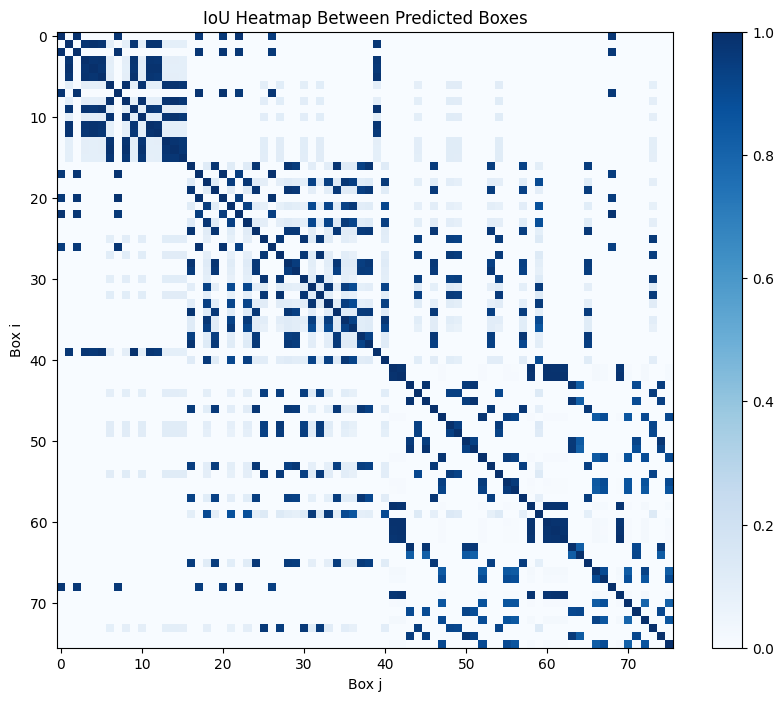

In [14]:
plt.figure(figsize=(10, 8))
plt.imshow(ious, cmap="Blues")
plt.colorbar()
plt.title("IoU Heatmap Between Predicted Boxes")
plt.xlabel("Box j")
plt.ylabel("Box i")
plt.show()